In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(random_state=95)

In [6]:
X_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X.npy")
X_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X_test.npy")
Y_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y.npy")
Y_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y_test.npy")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5670, 528), (3780, 528), (5670,), (3780,))

In [ ]:
ada.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=95)

In [ ]:
y_pred=ada.predict(X_test)
report = classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.74      0.89      0.81      2100
           1       0.82      0.61      0.70      1680

    accuracy                           0.76      3780
   macro avg       0.78      0.75      0.75      3780
weighted avg       0.77      0.76      0.76      3780



In [ ]:
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[1869  231]
 [ 659 1021]]


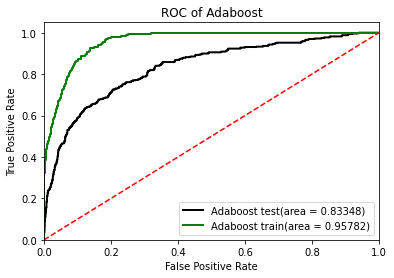

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = ada.predict_proba(X_test)
Y_pred_train = ada.predict_proba(X_train)
r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
r_roc_auc_train = roc_auc_score(Y_train, Y_pred_train[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
fpr_train, tpr_train ,_ = roc_curve(Y_train, Y_pred_train[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Adaboost test(area = %0.5f)' % r_roc_auc,color='black',
          lw=2)
plt.plot(fpr_train, tpr_train, label='Adaboost train(area = %0.5f)' % r_roc_auc_train,color='green',
          lw=2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Adaboost')
plt.legend(loc="lower right")
plt.show()

In [14]:
pip install scikit-learn

In [15]:
pip install optuna

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 54.1 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 144 kB 58.6 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 111 kB 58.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=abbee5972c9480d955b8839aa67ec693ef31d629885e7a8ecf76687319869eb6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [16]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial: Trial,X,y) -> float:


    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 100),
                
                'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
                
            }
    model = AdaBoostClassifier(**param)

    model.fit(X_train,Y_train)

    return cross_val_score(model,X_test,Y_test).mean()

In [ ]:
study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X_train,Y_train),timeout=600)

[I 2021-10-18 08:33:10,112] A new study created in memory with name: no-name-cca0071a-8681-4c1a-bbb1-517999b1ead0
[I 2021-10-18 08:33:34,510] Trial 0 finished with value: 0.8116402116402117 and parameters: {'n_estimators': 18, 'learning_rate': 0.01702196147772212}. Best is trial 0 with value: 0.8116402116402117.
[I 2021-10-18 08:34:06,866] Trial 1 finished with value: 0.8095238095238095 and parameters: {'n_estimators': 24, 'learning_rate': 0.045486876026104406}. Best is trial 0 with value: 0.8116402116402117.
[I 2021-10-18 08:35:07,354] Trial 2 finished with value: 0.8198412698412699 and parameters: {'n_estimators': 45, 'learning_rate': 0.0647239010682488}. Best is trial 2 with value: 0.8198412698412699.
[I 2021-10-18 08:36:03,830] Trial 3 finished with value: 0.8367724867724867 and parameters: {'n_estimators': 42, 'learning_rate': 0.11149958703488261}. Best is trial 3 with value: 0.8367724867724867.
[I 2021-10-18 08:37:45,994] Trial 4 finished with value: 0.8558201058201058 and parame

In [ ]:
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))
hist = study.trials_dataframe()
hist.head()

Best trial: score 0.9021164021164022,
params {'n_estimators': 100, 'learning_rate': 0.4788993937262692}


,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_n_estimators,state
0,0,0.811640,2021-10-18 08:33:10.124125,2021-10-18 08:33:34.510087,0 days 00:00:24.385962,0.017022,18,COMPLETE
1,1,0.809524,2021-10-18 08:33:34.513232,2021-10-18 08:34:06.866383,0 days 00:00:32.353151,0.045487,24,COMPLETE
2,2,0.819841,2021-10-18 08:34:06.868633,2021-10-18 08:35:07.353876,0 days 00:01:00.485243,0.064724,45,COMPLETE
3,3,0.836772,2021-10-18 08:35:07.359143,2021-10-18 08:36:03.829806,0 days 00:00:56.470663,0.111500,42,COMPLETE
4,4,0.855820,2021-10-18 08:36:03.832194,2021-10-18 08:37:45.993891,0 days 00:01:42.161697,0.149007,76,COMPLETE


In [ ]:
ada_opt = AdaBoostClassifier(**study.best_trial.params)

In [ ]:
ada_opt.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.4788993937262692, n_estimators=100,
                   random_state=None)

In [ ]:
y_pred_opt=ada_opt.predict(X_test)
report_opt = classification_report(Y_test,y_pred_opt)
print(report_opt)

              precision    recall  f1-score   support

          -1       0.78      0.90      0.84      2100
           1       0.85      0.69      0.76      1680

    accuracy                           0.81      3780
   macro avg       0.82      0.80      0.80      3780
weighted avg       0.81      0.81      0.81      3780



In [ ]:
cm_opt = confusion_matrix(Y_test,y_pred_opt)
print(cm_opt)

[[1896  204]
 [ 520 1160]]


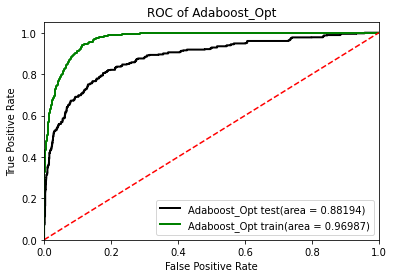

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = ada_opt.predict_proba(X_test)
Y_pred_train = ada_opt.predict_proba(X_train)
r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
r_roc_auc_train = roc_auc_score(Y_train, Y_pred_train[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
fpr_train, tpr_train ,_ = roc_curve(Y_train, Y_pred_train[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Adaboost_Opt test(area = %0.5f)' % r_roc_auc,color='black',
          lw=2)
plt.plot(fpr_train, tpr_train, label='Adaboost_Opt train(area = %0.5f)' % r_roc_auc_train,color='green',
          lw=2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Adaboost_Opt')
plt.legend(loc="lower right")
plt.show()

In [ ]:
optuna.visualization.plot_param_importances(study)

## XGBoost Classifier

In [3]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn import metrics

In [7]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [8]:
y_pred=xgb.predict(X_test)
report_2 = classification_report(Y_test,y_pred)
print(report_2)

              precision    recall  f1-score   support

          -1       0.76      0.94      0.84      2100
           1       0.89      0.63      0.74      1680

    accuracy                           0.80      3780
   macro avg       0.83      0.78      0.79      3780
weighted avg       0.82      0.80      0.79      3780



In [9]:
cm_2 = confusion_matrix(Y_test,y_pred)
print(cm_2)

[[1971  129]
 [ 623 1057]]


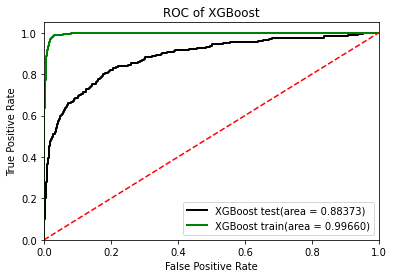

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = xgb.predict_proba(X_test)
Y_pred_train = xgb.predict_proba(X_train)
r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
r_roc_auc_train = roc_auc_score(Y_train, Y_pred_train[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
fpr_train, tpr_train ,_ = roc_curve(Y_train, Y_pred_train[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost test(area = %0.5f)' % r_roc_auc,color='black',
          lw=2)
plt.plot(fpr_train, tpr_train, label='XGBoost train(area = %0.5f)' % r_roc_auc_train,color='green',
          lw=2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of XGBoost')
plt.legend(loc="lower right")
plt.show()

In [17]:
def objective_2(trial: Trial,X,y) -> float:

    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 100),
                'max_depth':trial.suggest_int('max_depth', 2, 25),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
                'gamma':trial.suggest_int('gamma', 0, 5),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
                'nthread' : -1
            }
    model = XGBClassifier(**param)

    model.fit(X_train,Y_train)

    return cross_val_score(model,X_test,Y_test).mean()

In [ ]:
study_2 = optuna.create_study(direction='maximize',sampler=TPESampler())
study_2.optimize(lambda trial : objective_2(trial,X_train,Y_train),timeout=600)

[I 2021-10-18 10:32:39,942] A new study created in memory with name: no-name-28c534f5-2398-45c2-b32d-dd24acbdd638
[I 2021-10-18 10:32:40,107] Trial 0 finished with value: 0.5555555555555556 and parameters: {'n_estimators': 0, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 3, 'learning_rate': 0.08128372365633475}. Best is trial 0 with value: 0.5555555555555556.
[I 2021-10-18 10:34:35,101] Trial 1 finished with value: 0.9375661375661377 and parameters: {'n_estimators': 74, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.01625711409241532}. Best is trial 1 with value: 0.9375661375661377.
[I 2021-10-18 10:35:50,180] Trial 2 finished with value: 0.9544973544973546 and parameters: {'n_estimators': 31, 'max_depth': 16, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.4023377125688847}. Best is trial 2 with value: 0.9544973544973546.
[I 2021-10-18 10:37:15,291] Trial 3 finished with value: 0.9365079365079364 and parameters: {'n_estimators': 45, 'max_depth': 20, 'min

In [ ]:
print('Best trial: score {},\nparams {}'.format(study_2.best_trial.value,study_2.best_trial.params))
hist = study_2.trials_dataframe()
hist.head()

Best trial: score 0.9515873015873015,
params {'n_estimators': 76, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.16416958918155822}


,number,value,datetime_start,datetime_complete,duration,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,state
0,0,0.939947,2021-10-18 09:49:45.961903,2021-10-18 09:51:59.482059,0 days 00:02:13.520156,5,0.030676,23,2,65,COMPLETE
1,1,0.946825,2021-10-18 09:51:59.484358,2021-10-18 09:53:34.507096,0 days 00:01:35.022738,3,0.189676,24,3,62,COMPLETE
2,2,0.951587,2021-10-18 09:53:34.509663,2021-10-18 09:55:13.551480,0 days 00:01:39.041817,0,0.164170,8,1,76,COMPLETE
3,3,0.877778,2021-10-18 09:55:13.553608,2021-10-18 09:55:57.660209,0 days 00:00:44.106601,1,0.008317,5,5,44,COMPLETE
4,4,0.946825,2021-10-18 09:55:57.662198,2021-10-18 09:58:49.141155,0 days 00:02:51.478957,0,0.029672,21,3,94,COMPLETE


In [ ]:
xgb_opt = XGBClassifier(**study_2.best_trial.params)
xgb_opt.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.16416958918155822, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=76, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_3 = xgb_opt.predict(X_test)
report_3 = classification_report(Y_test,y_pred_3)
print(report_3)

              precision    recall  f1-score   support

          -1       0.68      0.98      0.80      2100
           1       0.94      0.42      0.58      1680

    accuracy                           0.73      3780
   macro avg       0.81      0.70      0.69      3780
weighted avg       0.79      0.73      0.70      3780



In [ ]:
cm_3 = confusion_matrix(Y_test,y_pred_3)
print(cm_3)

[[2055   45]
 [ 976  704]]


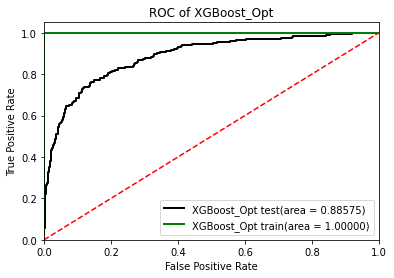

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = xgb_opt.predict_proba(X_test)
Y_pred_train = xgb_opt.predict_proba(X_train)
r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
r_roc_auc_train = roc_auc_score(Y_train, Y_pred_train[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
fpr_train, tpr_train ,_ = roc_curve(Y_train, Y_pred_train[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost_Opt test(area = %0.5f)' % r_roc_auc,color='black',
          lw=2)
plt.plot(fpr_train, tpr_train, label='XGBoost_Opt train(area = %0.5f)' % r_roc_auc_train,color='green',
          lw=2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of XGBoost_Opt')
plt.legend(loc="lower right")
plt.show()

In [ ]:
optuna.visualization.plot_param_importances(study_2)